### Подключение библиотек 

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV


import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Загрузка данных

In [5]:
data_test = pd.read_csv('test.csv', index_col=0)
data_train = pd.read_csv('train.csv', index_col=0)

### Проверка загруженых данных

In [6]:
data_train.shape

(10000, 19)

In [7]:
data_test.shape

(5000, 18)

In [8]:
data_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [9]:
data_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [10]:
data_train.shape[1]-1 == data_test.shape[1]

True

### Предварительный анализ данных 

In [11]:
# Проверияем есть ли нулевые колонки
data_train.isnull().any()

DistrictId       False
Rooms            False
Square           False
LifeSquare        True
KitchenSquare    False
Floor            False
HouseFloor       False
HouseYear        False
Ecology_1        False
Ecology_2        False
Ecology_3        False
Social_1         False
Social_2         False
Social_3         False
Healthcare_1      True
Helthcare_2      False
Shops_1          False
Shops_2          False
Price            False
dtype: bool

In [12]:
data_train.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [13]:
data_train['DistrictId'] = data_train['DistrictId'].astype(str)

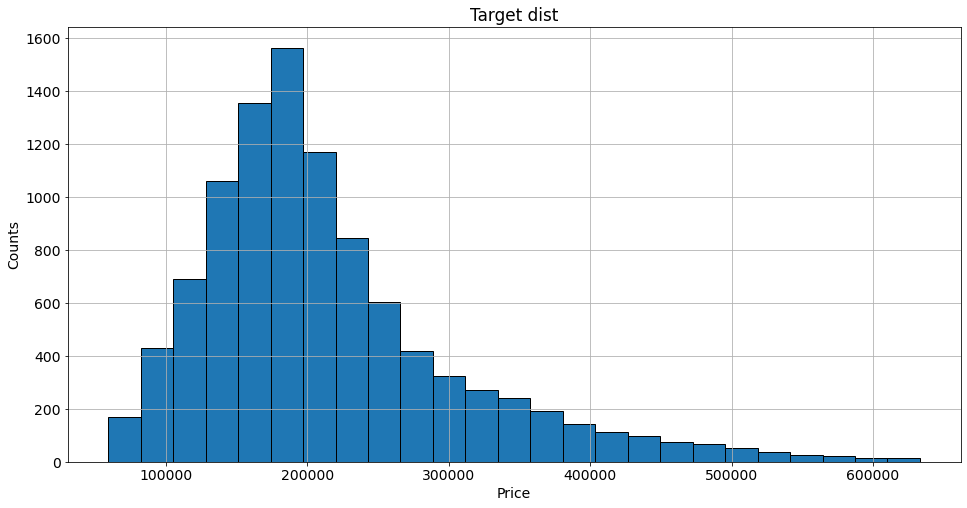

In [14]:
plt.figure(figsize=(16, 8))
data_train['Price'].hist(bins=25, ec='black')
plt.ylabel('Counts')
plt.xlabel('Price')

plt.title('Target dist')
plt.show()

In [15]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04


### Предварительный анализ показал, есть очевидные некорректные данные, касательно колличества комнат и квадратуры помещений, больший этаж кваритиры чем колличество этажей в доме, а так же нулевые этажи. Есть нулевые значения в данных (пропущенные строки).

In [16]:
data_train.select_dtypes(include='object').columns.tolist()

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [17]:
data_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
data_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [19]:
data_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [20]:
data_train['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

#### Проверияем сколько не заполненных строк есть в дата сете

In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 11809 to 7202
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

#### Проработка выбросов по комнатам 

In [22]:
data_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [23]:
# Все значения от 0 комнат, и болше 5 приравниваем к медиане.
median = data_train['Rooms'].median()
data_train.loc[(data_train['Rooms'] > 5) | (data_train['Rooms'] == 0), 'Rooms'] = median

In [24]:
data_train['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [25]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.888400,0.811056,1.000000,1.000000,2.000000,2.000000,5.000000e+00
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04


In [26]:
data_train.shape

(10000, 19)

#### Смотрим корреляию

In [27]:
data_train.corr()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Rooms,1.000000,0.689532,0.138272,0.004641,-0.006098,-0.033573,-0.010959,-0.030731,0.076405,0.071335,0.014031,0.045060,0.063121,0.053238,0.571638
Square,0.689532,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.138272,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.004641,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,-0.006098,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.033573,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,-0.010959,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,-0.030731,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381
Social_1,0.076405,-0.070690,-0.048363,0.043379,-0.044914,-0.020801,0.003026,0.026464,1.000000,0.955988,0.023721,0.077133,0.524593,0.526272,0.263286
Social_2,0.071335,-0.043120,-0.039283,0.037805,-0.016560,0.007194,0.001970,0.009264,0.955988,1.000000,0.073379,0.050458,0.473193,0.559163,0.239226


#### Построим тепловой график корреляции

<function matplotlib.pyplot.show(close=None, block=None)>

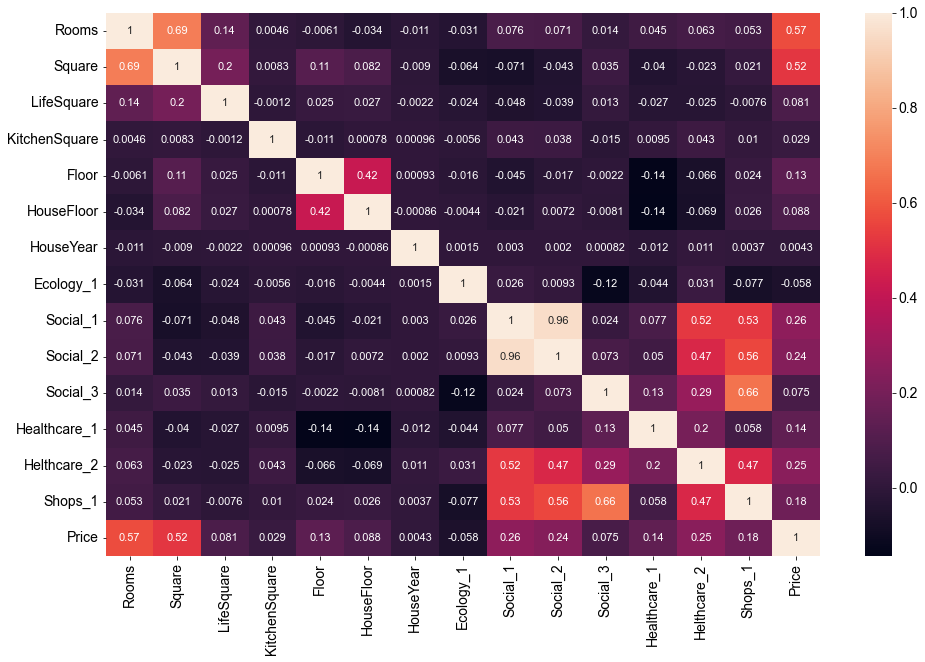

In [28]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_train.corr(), mask=False , annot=True, annot_kws={'size': 11})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

#### Проработка даты ввода в эксплуатацию здания 

In [29]:
data_train['HouseYear'].sort_values(ascending=False)

Id
10814    20052011
11607        4968
8892         2020
2530         2020
9600         2020
           ...   
7920         1916
6751         1914
14556        1912
2085         1912
13288        1910
Name: HouseYear, Length: 10000, dtype: int64

In [30]:
# приравниваем любую дату больше 2020 года к 2020 году
data_train.loc[data_train['HouseYear'] > 2020, 'HouseYear'] = 2020

In [31]:
data_train['HouseYear'].sort_values(ascending=False)

Id
8892     2020
2530     2020
9600     2020
14664    2020
6731     2020
         ... 
7920     1916
6751     1914
14556    1912
2085     1912
13288    1910
Name: HouseYear, Length: 10000, dtype: int64

#### Проработка данных по площади жилых и не жилых помещений, а так же площади кухни

In [32]:
data_train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [33]:
data_train['KitchenSquare'].quantile(.975), data_train['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [34]:
kitch_squad_med = data_train['KitchenSquare'].median()
condition = (data_train['KitchenSquare'].isna()) | (data_train['KitchenSquare'] > data_train['KitchenSquare'].quantile(.975))
data_train.loc[condition, 'KitchenSquare'] = kitch_squad_med
data_train.loc[data_train['KitchenSquare'] < 5, 'KitchenSquare'] = 5

In [35]:
data_train['KitchenSquare'].value_counts()

5.0     4391
8.0     1306
6.0     1227
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
Name: KitchenSquare, dtype: int64

#### Проработка нулевых значений 

In [36]:
data_train.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### Отметим что в колнках LifeSquare и Healthcare_1 есть нулевые значения. Заполним их, что бы не потреять данные и использовать для построения модели.

In [37]:
data_train[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
Id,,,
11809,115.027311,NaN,10.0
3013,39.832524,23.169223,8.0
8215,78.342215,47.671972,10.0
2352,40.409907,NaN,5.0
13866,64.285067,38.562517,9.0
5804,62.528465,47.103833,6.0
8864,33.938750,21.772930,9.0
13072,50.391814,32.893256,8.0
9951,46.887892,44.628132,5.0


In [38]:
data_train['LifeSquare_nan'] = data_train['LifeSquare'].isna() * 1

condition = (data_train['LifeSquare'].isna()) & (~data_train['Square'].isna()) & (~data_train['KitchenSquare'].isna())
condition.sum()

2113

In [39]:
data_train.loc[condition, 'LifeSquare'] = data_train.loc[condition, 'Square'] - data_train.loc[condition, 'KitchenSquare'] - 3

In [40]:
data_train['LifeSquare_nan'] = data_train['LifeSquare'].isna() * 1

condition = (data_train['LifeSquare'].isna()) & (~data_train['Square'].isna()) & (~data_train['KitchenSquare'].isna())
condition.sum()

0

In [41]:
data_train['Healthcare_1'].value_counts().sort_index()

0.0         1
30.0      348
32.0       12
35.0        2
46.0       49
         ... 
4087.0     45
4129.0     37
4508.0     46
4702.0     27
4849.0     15
Name: Healthcare_1, Length: 79, dtype: int64

In [42]:
data_train['Healthcare_1'].fillna(0, inplace=True)

In [30]:
#life_out = data_train.loc[data_train['LifeSquare'] > data_train['Square']].index

In [31]:
#data_train.loc[life_out, 'LifeSquare'] = data_train.loc[life_out, 'Square']

In [32]:
#kitch_out = data_train.loc[data_train['KitchenSquare'] > data_train['LifeSquare']].index

In [33]:
#data_train.loc[kitch_out, 'KitchenSquare'] = data_train.loc[kitch_out, 'LifeSquare'].median()

In [43]:
# Проверяю былили потеряные данные
data_train.shape

(10000, 20)

<function matplotlib.pyplot.show(close=None, block=None)>

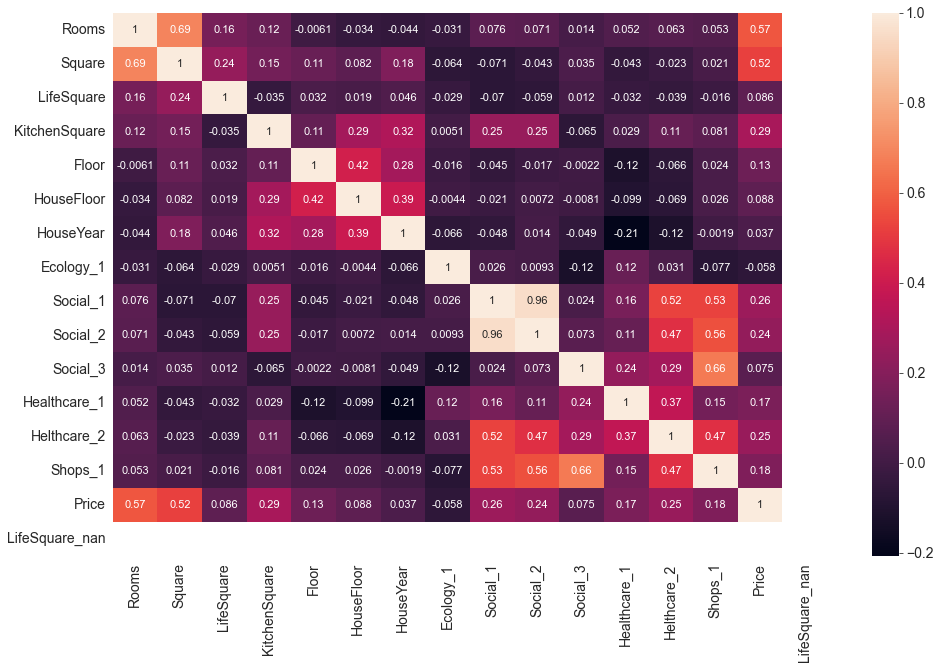

In [44]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_train.corr(), mask=False , annot=True, annot_kws={'size': 11})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

#### Проработка выбросов с этажами

In [45]:
data_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [46]:
data_train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [47]:
data_train.loc[data_train['HouseFloor'] == 0, 'HouseFloor'] = 1

In [48]:
sum(data_train['HouseFloor'] < data_train['Floor'])

1818

In [49]:
floor_out = data_train.loc[data_train['HouseFloor'] < data_train['Floor']].index

In [50]:
data_train.loc[floor_out, 'Floor'] = data_train.loc[floor_out, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [51]:
sum(data_train['HouseFloor'] < data_train['Floor'])

0

#### Подготовка исходных данных создаем новый класс

In [52]:
class Preproc:
    def __init__(self):
        self.medians = None
        self.kitchen_square_quantile = None
    
    def fit_p(self, X):
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform_p(self, X):
        #rooms
        
        X.loc[X['Rooms'] == 0, 'Rooms'] == 1
        X.loc[X['Rooms'] > 5, 'Rooms'] = self.medians['Rooms']
        
        # Square
        X.loc[X['Square'] > 300, 'Square'] = self.medians['Square']
        X.loc[X['Square'] < 20, 'Square'] = self.medians['Square']
        
        # LifeSquare
        X.loc[X['LifeSquare'] <= 0, 'LifeSquare'] = self.medians['LifeSquare']
        
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        condition = X['LifeSquare'] > X['Square']
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] \
                                            - X.loc[condition, 'KitchenSquare'] - 3
        X.fillna(self.medians, inplace=True)
        
        #KitchenSquare
        
        condition = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < 5, 'KitchenSquare'] = 5
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        #houseyear
        
        X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020
        
                
        # Healthcare_1
        X['Healthcare_1'].fillna(0, inplace=True)
        
        # Меняем буквнные признаки, на численные.
        
        binary_to_number = {'A': 0, 'B': 1}
        X['Ecology_2'] = X['Ecology_2'].replace(binary_to_number)
        X['Ecology_3'] = X['Ecology_3'].replace(binary_to_number)
        X['Shops_2'] = X['Shops_2'].replace(binary_to_number)
        
        return X



### Создаем новые признаки 

#### Меняем буквнные признаки, на численные. Так как есть возможность использовать бинарную систему воспользуемся этим. 

In [53]:
binary_to_number = {'A': 0, 'B': 1}
data_train['Ecology_2'] = data_train['Ecology_2'].replace(binary_to_number)
data_train['Ecology_3'] = data_train['Ecology_3'].replace(binary_to_number)
data_train['Shops_2'] = data_train['Shops_2'].replace(binary_to_number)

In [54]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867
Social_1,5000.0,24.933800,17.532202,0.000000,6.000000,25.000000,36.000000,74.000000


In [55]:
data_train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
Id,,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0.0,0,0,1,305018.871089,0
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,177734.553407,0
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,282078.720850,0
2352,1,1.0,40.409907,32.409907,5.0,10,22.0,1977,0.007122,1,1,1,264,0,0.0,0,1,1,168106.007630,0
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0.0,0,6,1,343995.102962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,0.0,1,9,1,119367.455796,0
16265,27,2.0,64.307684,37.038420,9.0,1,1.0,1977,0.072158,1,1,2,629,1,0.0,0,0,0,199715.148807,0
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,0.0,1,5,1,165953.912580,0


In [296]:
data_test.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'LifeSquare_nan',
 'HouseFloor_outlier']

#### Выбор признаков и целевого показателя

In [58]:
feat = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Social_1',
        'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Ecology_1', 'Ecology_2', 'Ecology_3' , 'Shops_1', 'Shops_2']

target_name = 'Price'

In [59]:
#feat = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Social_1',
#        'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Ecology_1', 'Ecology_2', 'Ecology_3' , 'Shops_1', 'Shops_2',
#       ]
data_test = pd.read_csv('test.csv', index_col=0)
data_train = pd.read_csv('train.csv', index_col=0)

x = data_train.drop(columns=target_name)
y = data_train[target_name]


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.21, random_state = 21)

In [61]:
prep = Preproc()
prep.fit_p(x_train)
x_train = prep.transform_p(x_train)
x_test = prep.transform_p(x_test)
data_test = prep.transform_p(data_test)

x_train.shape, x_test.shape, data_test.shape

((7900, 20), (2100, 20), (5000, 20))

#### Приминение модели RandomForest для обучения

In [62]:
model = RandomForestRegressor(n_estimators=200)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

#### Проверка модели

Train R2:	0.963
Test R2:	0.749


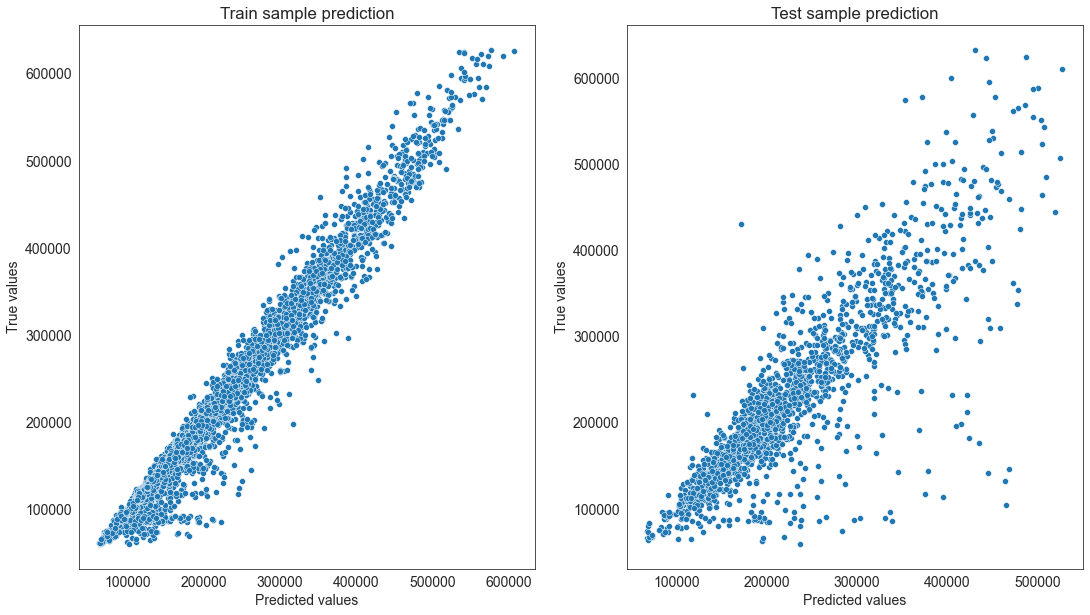

In [63]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
evaluate_preds(y_train, train_pred, y_test, test_pred)

In [64]:
cv_score = cross_val_score(model, x_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.70276516, 0.72231955, 0.72114321])

In [65]:
cv_score.mean()

0.7154093082389802

In [199]:
model.fit(x, y)

RandomForestRegressor(n_estimators=200)

#### Прогнозирование на тестовом датасете

In [66]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [67]:
pred = model.predict(data_test)
pred

array([150616.81876166, 119689.85744969, 139599.62607345, ...,
       144089.95975397, 191817.76817142, 252885.11021825])

In [68]:
submit['Price'] = pred
submit.head()

,Id,Price
0,4567,150616.818762
1,5925,119689.857450
2,960,139599.626073
3,3848,125758.542062
4,746,227395.946085


In [69]:
submit.to_csv('gb_cours_.csv', index=False)